In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import datetime
import pandas_datareader.data as web
import statsmodels.api as sm
import matplotlib.cm as cm

In [2]:
#Stocks in the Utility Industry
stocks = [
    "NEE",  # Nextera Energy Inc
    "SO",   # Southern Co
    "DUK",  # Duke Energy Corp
    "AEP",  # American Electric Power Company Inc
    "XEL",  # Xcel Energy Inc
    "ED",   # Consolidated Edison Inc
    "PCG",  # PG&E Corp
    "ETR",  # Entergy Corp
    "LNT",  # Alliant Energy Corp
    "PNW",  # Pinnacle West Capital Corp
    "AES",  # AES Corp
    "OGE"   # OGE Energy Corp
]

data = yf.download(stocks, start="2017-01-01", end="2025-01-01", auto_adjust=True, interval='1mo')['Close']
data.head()


[*********************100%***********************]  12 of 12 completed


Ticker,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL
Date,,,,,,,,,,,,
2017-01-01,47.783508,8.559610,55.768974,55.155293,22.284422,29.036821,25.224041,23.584251,60.267818,55.866520,34.805756,32.119232
2017-02-01,49.954144,8.711165,58.616371,57.150818,23.845945,30.709988,26.708288,26.132010,65.000435,59.657131,35.784523,33.977047
2017-03-01,50.539906,8.454067,58.877991,58.147495,23.918543,30.811100,26.372782,24.819386,64.620667,60.520908,35.462944,34.552269
2017-04-01,51.066917,8.552371,59.229778,59.360458,24.013018,30.585535,27.439032,24.677475,65.771172,61.762093,35.477200,35.310894
2017-05-01,54.040726,8.925699,61.512814,61.988548,24.894686,32.513920,29.057924,25.499575,67.075790,64.619064,36.054230,37.552608


In [3]:
#Calculate Returns
price_data=data
returns=price_data.pct_change().dropna()
returns.head()

Ticker,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL
Date,,,,,,,,,,,,
2017-02-01,0.045426,0.017706,0.051057,0.036180,0.070072,0.057622,0.058843,0.108028,0.078526,0.067851,0.028121,0.057841
2017-03-01,0.011726,-0.029514,0.004463,0.017439,0.003044,0.003292,-0.012562,-0.050231,-0.005843,0.014479,-0.008987,0.016930
2017-04-01,0.010428,0.011628,0.005975,0.020860,0.003950,-0.007321,0.040430,-0.005718,0.017804,0.020508,0.000402,0.021956
2017-05-01,0.058234,0.043652,0.038545,0.044273,0.036716,0.063049,0.059000,0.033314,0.019836,0.046258,0.016265,0.063485
2017-06-01,-0.023762,-0.048801,-0.014253,-0.015291,-0.006557,-0.031348,-0.002264,-0.023576,-0.029395,-0.036106,-0.042809,-0.042371


In [4]:
returns.columns

Index(['AEP', 'AES', 'DUK', 'ED', 'ETR', 'LNT', 'NEE', 'OGE', 'PCG', 'PNW',
       'SO', 'XEL'],
      dtype='object', name='Ticker')

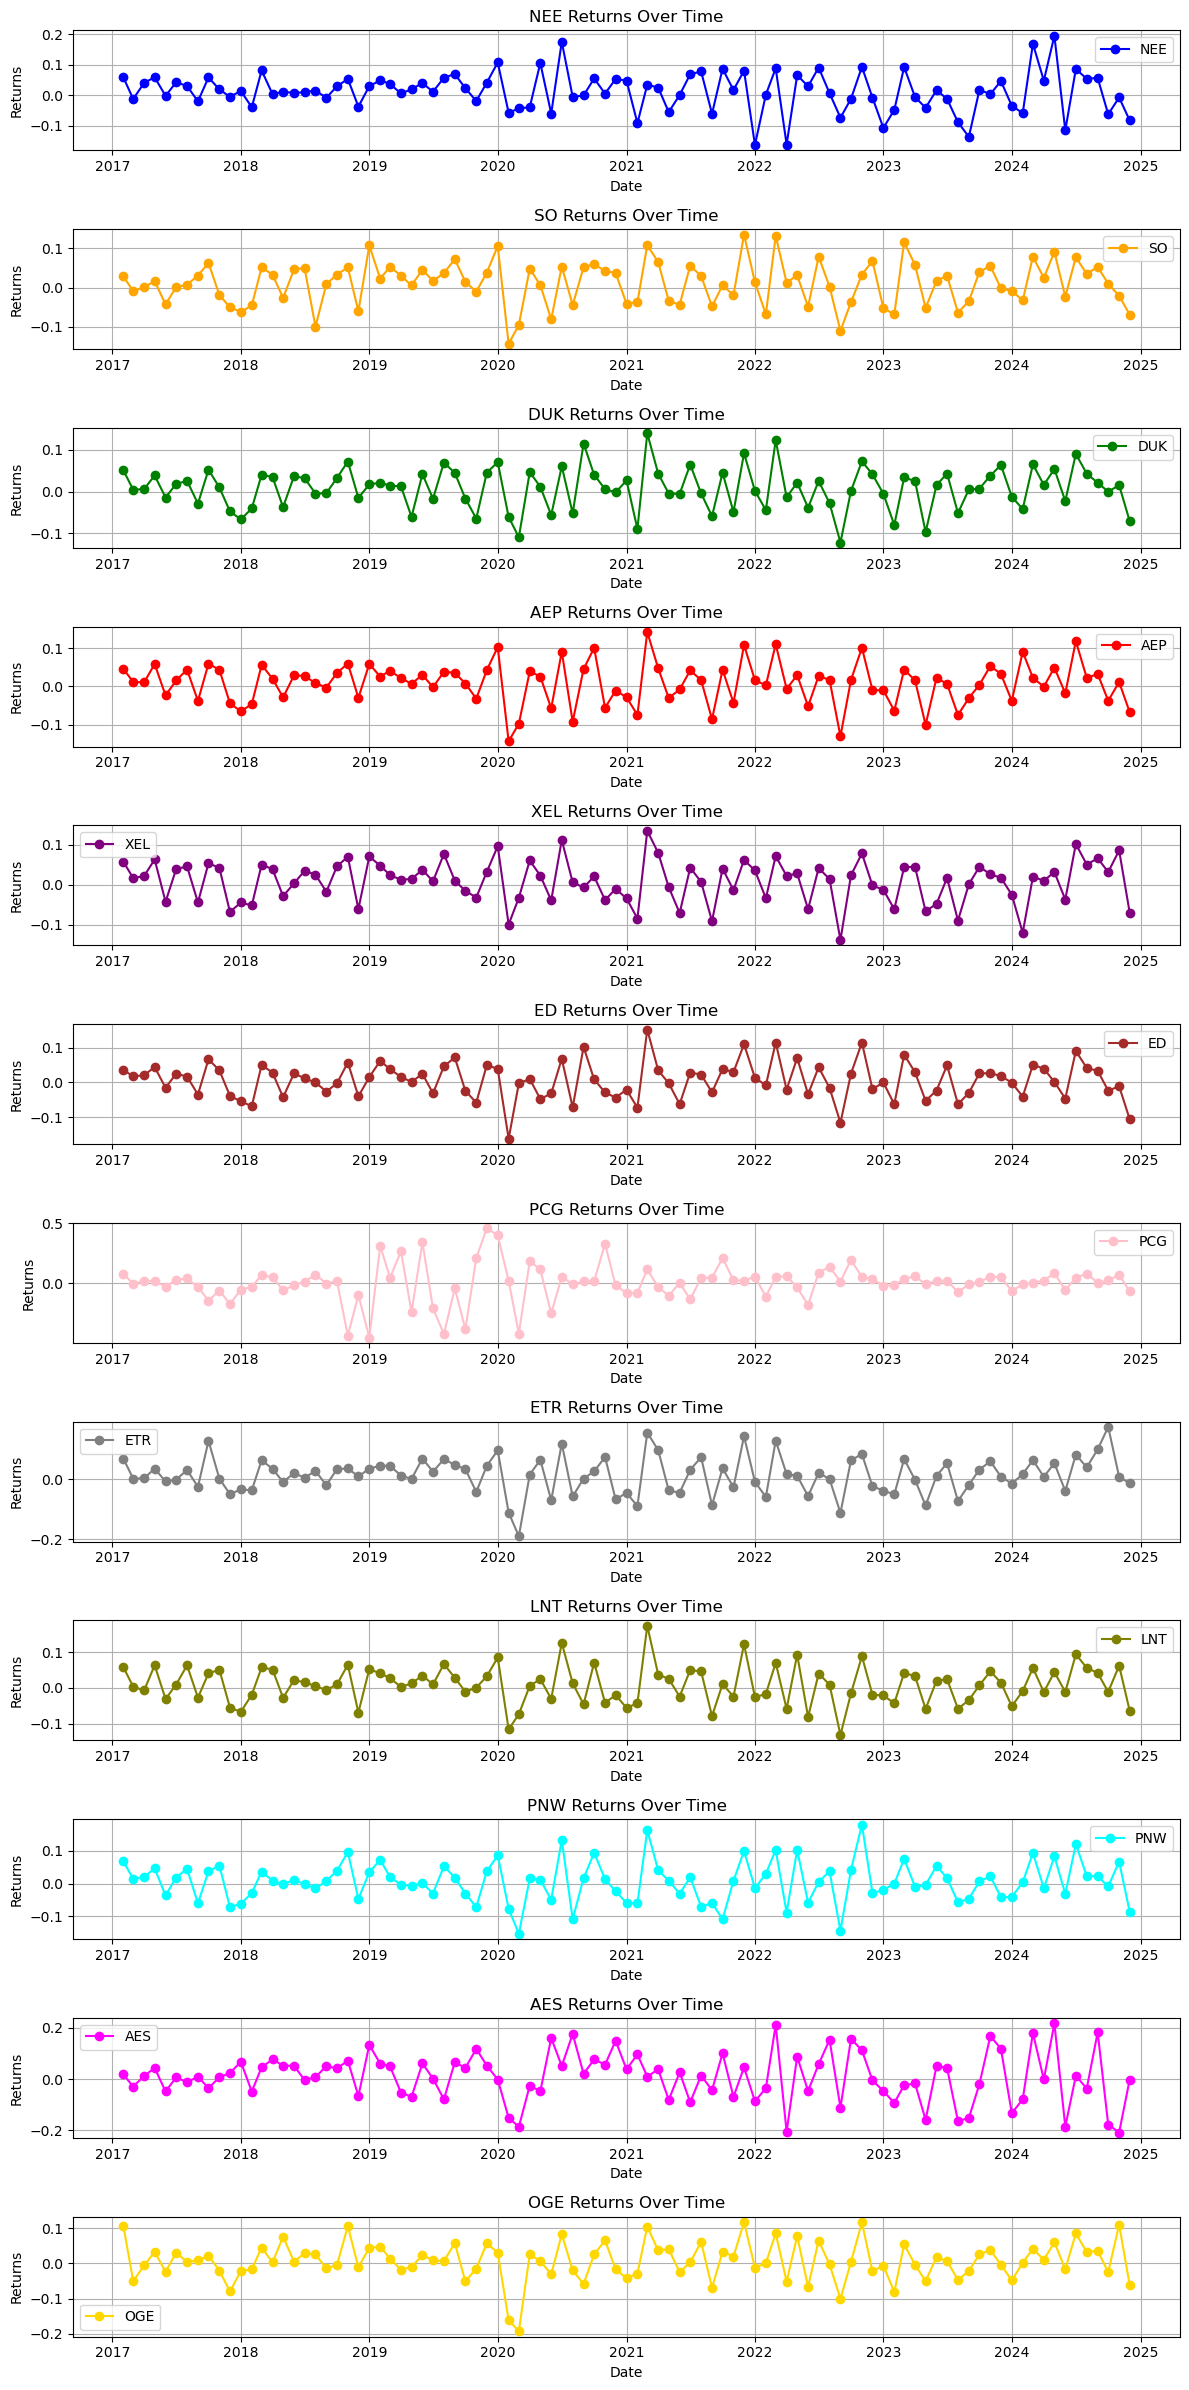

In [5]:
#Define a set of distinct colors for each subplot
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "magenta", "gold"]

#Plot returns for all 12 companies with different colors
plt.figure(figsize=(12, 24))

for i, (stock, color) in enumerate(zip(stocks, colors), 1):
    plt.subplot(12, 1, i)
    plt.plot(returns.index, returns[stock], marker='o', color=color, label=stock)
    plt.title(f'{stock} Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [6]:
#Function to calculate CAGR
def calculate_cagr(start_value, end_value, years):
    if start_value > 0 and end_value > 0 and years > 0:
        return ((end_value / start_value) ** (1 / years)) - 1
    else:
        return np.nan

#Calculate CAGR per year
cagr_per_year = pd.DataFrame(index=data.columns, columns=range(2017, 2025))

for stock in data.columns:
    for year in range(2017, 2025):
        yearly_data = data.loc[data.index.year == year, stock]
        if not yearly_data.empty and yearly_data.iloc[0] > 0 and yearly_data.iloc[-1] > 0:
            start_value = yearly_data.iloc[0]
            end_value = yearly_data.iloc[-1]
            cagr_per_year.loc[stock, year] = calculate_cagr(start_value, end_value, 1)

#Calculate 8-year CAGR
cagr_last_8_years = pd.DataFrame(index=data.columns, columns=["8-Year CAGR"])

for stock in data.columns:
    start_8y_data = data.loc[data.index.year == 2017, stock]
    if not start_8y_data.empty and start_8y_data.iloc[0] > 0:
        start_8y_value = start_8y_data.iloc[0]
        end_value = data[stock].dropna().iloc[-1]
        cagr_last_8_years.loc[stock, "8-Year CAGR"] = calculate_cagr(start_8y_value, end_value, 8)

#Display CAGR grids
print("CAGR Per Year:")
print(cagr_per_year.fillna("N/A"))

print("\n8-Year CAGR:")
print(cagr_last_8_years.fillna("N/A"))

CAGR Per Year:
            2017      2018      2019      2020      2021      2022      2023  \
Ticker                                                                         
AEP     0.188739  0.127236  0.232941 -0.174875  0.139093  0.086343 -0.100382   
AES    -0.011583  0.302416  0.254196  0.223932  0.020796  0.333191 -0.274713   
DUK     0.116327  0.150924  0.084287 -0.021181  0.160195  0.018711 -0.011079   
ED      0.182264 -0.012875  0.206652 -0.201106  0.255498  0.141414 -0.011222   
ETR     0.202438  0.184156  0.418250 -0.207211  0.249883  0.062351 -0.004058   
LNT     0.167875  0.097352  0.267654 -0.107336  0.301347 -0.049483 -0.017378   
NEE     0.297683  0.126947  0.385722  0.174362  0.177165  0.092976 -0.163137   
OGE     0.016807  0.266384  0.124848 -0.271643  0.320989  0.088871 -0.070008   
PCG    -0.258746 -0.440254 -0.163846 -0.180802  0.062117  0.271306  0.133962   
PNW     0.132553  0.103524  0.054488 -0.150141 -0.020148  0.145961  0.007964   
SO      0.019186  0.02606

C:\Users\perci\AppData\Local\Temp\ipykernel_23096\1436228816.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(cagr_per_year.fillna("N/A"))
C:\Users\perci\AppData\Local\Temp\ipykernel_23096\1436228816.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(cagr_last_8_years.fillna("N/A"))


In [7]:
#Import dividend yield from Yahoo Finance
dividend_yields = {}

for ticker in data.columns:  # Ensure this is using the correct dataset
    stock = yf.Ticker(ticker)
    dividend_yield = stock.info.get('dividendYield')
    
    # Ensure dividend_yield is not None
    dividend_yields[ticker] = dividend_yield if dividend_yield is not None else 0

#Convert to  pd 
dividend_yields_series = pd.Series(dividend_yields)

print("Dividend Yields:\n", dividend_yields_series)

#Ensure cagr_last_8_years is in a compatible format
cagr_8yrs_series = cagr_last_8_years.squeeze()

#Calculate annual return including dividends for the past 8 years
annual_dividend_return_8yrs = cagr_8yrs_series + dividend_yields_series

print("8-Year Annual Return Including Dividends:\n", annual_dividend_return_8yrs)


Dividend Yields:
 AEP    3.50
AES    5.30
DUK    3.48
ED     3.13
ETR    2.84
LNT    3.19
NEE    3.18
OGE    3.72
PCG    0.58
PNW    3.80
SO     3.20
XEL    3.25
dtype: float64
8-Year Annual Return Including Dividends:
 Ticker
AEP    3.584411
AES    5.350234
DUK    3.564546
ED     3.190795
ETR     3.00433
LNT    3.281819
NEE    3.318309
OGE    3.791021
PCG    0.452041
PNW    3.852143
SO     3.312431
XEL    3.345048
dtype: object


In [8]:
tickers = [ "NEE",  # Nextera Energy Inc
    "SO",   # Southern Co
    "DUK",  # Duke Energy Corp
    "AEP",  # American Electric Power Company Inc
    "XEL",  # Xcel Energy Inc
    "ED",   # Consolidated Edison Inc
    "PCG",  # PG&E Corp
    "ETR",  # Entergy Corp
    "LNT",  # Alliant Energy Corp
    "PNW",  # Pinnacle West Capital Corp
    "AES",  # AES Corp
    "OGE",  # OGE Energy Corp
    "^GSPC" #snp500
          ]
start_date = "2017-01-01"
end_date   = "2025-01-01"

data = yf.download(tickers, start=start_date, end=end_date, interval="1mo", auto_adjust=True)
data.index = pd.to_datetime(data.index)

# Compute daily returns
close = data["Close"].dropna()
returns = close.pct_change().dropna()

# Resample to monthly
monthly_returns = returns.resample("ME").last().dropna()

# Then separate your columns:
nee_monthly = monthly_returns["NEE"]
so_monthly = monthly_returns["SO"]
duk_monthly = monthly_returns["DUK"]
aep_monthly = monthly_returns["AEP"]
xel_monthly = monthly_returns["XEL"]
ed_monthly = monthly_returns["ED"]
pcg_monthly = monthly_returns["PCG"]
etr_monthly = monthly_returns["ETR"]
lnt_monthly = monthly_returns["LNT"]
pnw_monthly = monthly_returns["PNW"]
aes_monthly = monthly_returns["AES"]
oge_monthly = monthly_returns["OGE"]
snp500_monthly = monthly_returns["^GSPC"]


# Now build a DataFrame:
df = pd.DataFrame({
    "NEE": nee_monthly,
    "SO": so_monthly,
    "DUK": duk_monthly,
    "AEP": aep_monthly,
    "XEL": xel_monthly,
    "ED": ed_monthly,
    "PCG": pcg_monthly,
    "ETR": etr_monthly,
    "LNT": lnt_monthly,
    "PNW": pnw_monthly,
    "AES": aes_monthly,
    "OGE": oge_monthly,
    "^GSPC" : snp500_monthly
})

print(df.head())

[*********************100%***********************]  13 of 13 completed

                 NEE        SO       DUK       AEP       XEL        ED  \
Date                                                                     
2017-02-28  0.058843  0.028121  0.051057  0.045426  0.057841  0.036180   
2017-03-31 -0.012562 -0.008987  0.004463  0.011726  0.016930  0.017439   
2017-04-30  0.040430  0.000402  0.005975  0.010428  0.021956  0.020860   
2017-05-31  0.059000  0.016265  0.038545  0.058234  0.063485  0.044273   
2017-06-30 -0.002264 -0.042809 -0.014253 -0.023762 -0.042371 -0.015291   

                 PCG       ETR       LNT       PNW       AES       OGE  \
Date                                                                     
2017-02-28  0.078526  0.070072  0.057622  0.067851  0.017706  0.108028   
2017-03-31 -0.005843  0.003044  0.003292  0.014479 -0.029514 -0.050231   
2017-04-30  0.017804  0.003950 -0.007321  0.020508  0.011628 -0.005718   
2017-05-31  0.019836  0.036716  0.063049  0.046258  0.043652  0.033314   
2017-06-30 -0.029395 -0.006557 -0.031

In [9]:
df.head()

,NEE,SO,DUK,AEP,XEL,ED,PCG,ETR,LNT,PNW,AES,OGE,^GSPC
Date,,,,,,,,,,,,,
2017-02-28,0.058843,0.028121,0.051057,0.045426,0.057841,0.036180,0.078526,0.070072,0.057622,0.067851,0.017706,0.108028,0.037198
2017-03-31,-0.012562,-0.008987,0.004463,0.011726,0.016930,0.017439,-0.005843,0.003044,0.003292,0.014479,-0.029514,-0.050231,-0.000389
2017-04-30,0.040430,0.000402,0.005975,0.010428,0.021956,0.020860,0.017804,0.003950,-0.007321,0.020508,0.011628,-0.005718,0.009091
2017-05-31,0.059000,0.016265,0.038545,0.058234,0.063485,0.044273,0.019836,0.036716,0.063049,0.046258,0.043652,0.033314,0.011576
2017-06-30,-0.002264,-0.042809,-0.014253,-0.023762,-0.042371,-0.015291,-0.029395,-0.006557,-0.031348,-0.036106,-0.048801,-0.023576,0.004814


In [10]:
# Download Risk-Free Rate from FRED (TB3MS)
# TB3MS = 3-month T-bill
# Convert from percent/year to decimal/month

rf_data = web.DataReader("TB3MS", "fred", start_date, end_date).dropna()   # daily or monthly data
rf_data["rf"] = rf_data["TB3MS"] / 100.0 / 12.0                  # annual % to monthly decimal

# We resample to get the last available value each month
rf_data = rf_data.resample("ME").last()

rf_series = rf_data["rf"].squeeze()   # ensures shape is (N,) rather than (N,1)

print("Risk-free series shape:", rf_series.shape)
rf_series.head()


Risk-free series shape: (97,)


DATE
2017-01-31    0.000425
2017-02-28    0.000433
2017-03-31    0.000617
2017-04-30    0.000667
2017-05-31    0.000742
Freq: ME, Name: rf, dtype: float64

In [11]:
df=df.join(rf_series,how="inner")
df.rename(columns={"rf":"RF"},inplace=True)
df.head()
          

,NEE,SO,DUK,AEP,XEL,ED,PCG,ETR,LNT,PNW,AES,OGE,^GSPC,RF
2017-02-28,0.058843,0.028121,0.051057,0.045426,0.057841,0.036180,0.078526,0.070072,0.057622,0.067851,0.017706,0.108028,0.037198,0.000433
2017-03-31,-0.012562,-0.008987,0.004463,0.011726,0.016930,0.017439,-0.005843,0.003044,0.003292,0.014479,-0.029514,-0.050231,-0.000389,0.000617
2017-04-30,0.040430,0.000402,0.005975,0.010428,0.021956,0.020860,0.017804,0.003950,-0.007321,0.020508,0.011628,-0.005718,0.009091,0.000667
2017-05-31,0.059000,0.016265,0.038545,0.058234,0.063485,0.044273,0.019836,0.036716,0.063049,0.046258,0.043652,0.033314,0.011576,0.000742
2017-06-30,-0.002264,-0.042809,-0.014253,-0.023762,-0.042371,-0.015291,-0.029395,-0.006557,-0.031348,-0.036106,-0.048801,-0.023576,0.004814,0.000817


In [12]:
#CAPM
df["Excess_NEE"] = df["NEE"] - rf_series
df["Excess_SO"] = df["SO"] - rf_series
df["Excess_DUK"] = df["DUK"] - rf_series
df["Excess_AEP"] = df["AEP"] - rf_series
df["Excess_XEL"] = df["XEL"] - rf_series
df["Excess_ED"] = df["ED"] - rf_series
df["Excess_PCG"] = df["PCG"] - rf_series
df["Excess_ETR"] = df["ETR"] - rf_series
df["Excess_LNT"] = df["LNT"] - rf_series
df["Excess_PNW"] = df["PNW"] - rf_series
df["Excess_AES"] = df["AES"] - rf_series
df["Excess_OGE"] = df["OGE"] - rf_series
df["Excess_^GSPC"] = df["^GSPC"] - rf_series


X = df["Excess_^GSPC"]
a = df["Excess_NEE"]
b = df["Excess_SO"]
c = df["Excess_DUK"]
d = df["Excess_AEP"]
e = df["Excess_XEL"]
f = df["Excess_ED"]
g = df["Excess_PCG"]
h = df["Excess_ETR"]
i = df["Excess_LNT"]
j = df["Excess_PNW"]
k = df["Excess_AES"]
l = df["Excess_OGE"]

X = sm.add_constant(X)

# Add intercept
capm_model1 = sm.OLS(a, X).fit()
capm_model2 = sm.OLS(b, X).fit()
capm_model3 = sm.OLS(c, X).fit()
capm_model4 = sm.OLS(d, X).fit()
capm_model5 = sm.OLS(e, X).fit()
capm_model6 = sm.OLS(f, X).fit()
capm_model7 = sm.OLS(g, X).fit()
capm_model8 = sm.OLS(h, X).fit()
capm_model9 = sm.OLS(i, X).fit()
capm_model10 = sm.OLS(j, X).fit()
capm_model11 = sm.OLS(k, X).fit()
capm_model12 = sm.OLS(l, X).fit()

print("NEE Summary:", capm_model1.summary())
print("SO Summary:", capm_model2.summary())
print("DUK Summary:", capm_model3.summary())
print("AEP Summary:", capm_model4.summary())
print("XEL Summary:", capm_model5.summary())
print("ED Summary:", capm_model6.summary())
print("PCG Summary:", capm_model7.summary())
print("ETR Summary:", capm_model8.summary())
print("LNT Summary:", capm_model9.summary())
print("PNW Summary:", capm_model10.summary())
print("AES Summary:", capm_model11.summary())
print("OGE Summary:", capm_model12.summary())

NEE Summary:                             OLS Regression Results                            
Dep. Variable:             Excess_NEE   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     13.03
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           0.000496
Time:                        13:41:35   Log-Likelihood:                 131.31
No. Observations:                  95   AIC:                            -258.6
Df Residuals:                      93   BIC:                            -253.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0067      0.006 

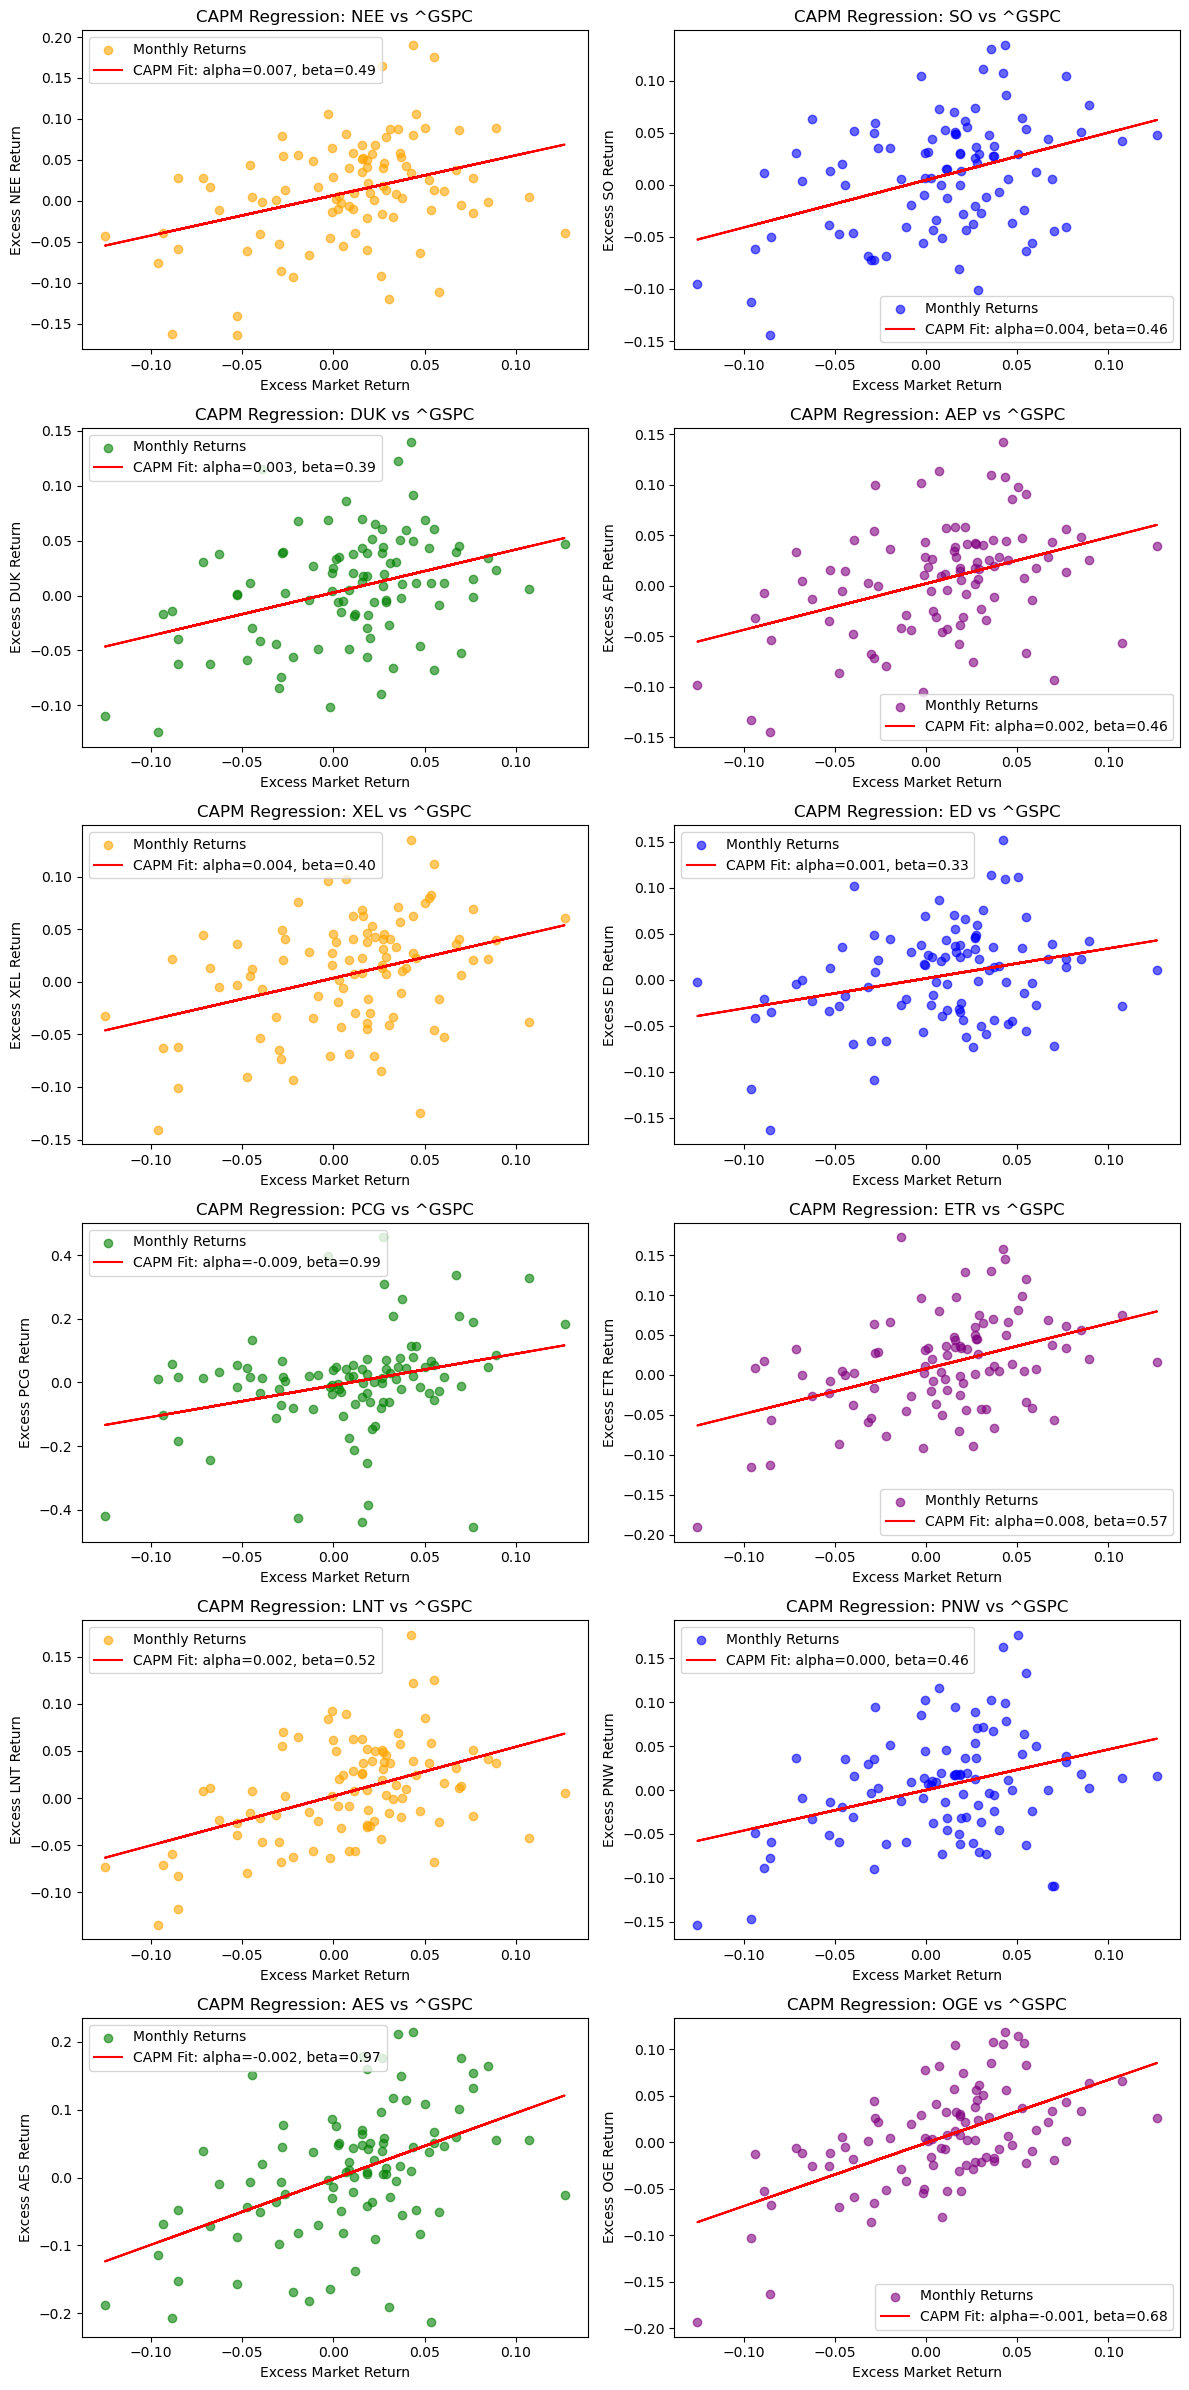

In [13]:
#CAPM plots

alpha_nee, beta_nee = capm_model1.params
alpha_so, beta_so = capm_model2.params
alpha_duk, beta_duk = capm_model3.params
alpha_aep, beta_aep = capm_model4.params
alpha_xel, beta_xel = capm_model5.params
alpha_ed, beta_ed = capm_model6.params
alpha_pcg, beta_pcg = capm_model7.params
alpha_etr, beta_etr = capm_model8.params
alpha_lnt, beta_lnt = capm_model9.params
alpha_pnw, beta_pnw = capm_model10.params
alpha_aes, beta_aes = capm_model11.params
alpha_oge, beta_oge = capm_model12.params


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 24))

plt.subplot(6, 2, 1)
plt.scatter(df["Excess_^GSPC"], df["Excess_NEE"], alpha=0.6, label="Monthly Returns", color="orange")
reg_line = alpha_nee + beta_nee * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_nee:.3f}, beta={beta_nee:.2f}")
plt.legend()
plt.title("CAPM Regression: NEE vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess NEE Return")

plt.subplot(6, 2, 2)
plt.scatter(df["Excess_^GSPC"], df["Excess_SO"], alpha=0.6, label="Monthly Returns", color="blue")
reg_line = alpha_so + beta_so * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_so:.3f}, beta={beta_so:.2f}")
plt.legend()
plt.title("CAPM Regression: SO vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess SO Return")

plt.subplot(6, 2, 3)
plt.scatter(df["Excess_^GSPC"], df["Excess_DUK"], alpha=0.6, label="Monthly Returns", color="green")
reg_line = alpha_duk + beta_duk * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_duk:.3f}, beta={beta_duk:.2f}")
plt.legend()
plt.title("CAPM Regression: DUK vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess DUK Return")

plt.subplot(6, 2, 4)
plt.scatter(df["Excess_^GSPC"], df["Excess_AEP"], alpha=0.6, label="Monthly Returns", color="purple")
reg_line = alpha_aep + beta_aep * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_aep:.3f}, beta={beta_aep:.2f}")
plt.legend()
plt.title("CAPM Regression: AEP vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess AEP Return")

plt.subplot(6, 2, 5)
plt.scatter(df["Excess_^GSPC"], df["Excess_XEL"], alpha=0.6, label="Monthly Returns", color="orange")
reg_line = alpha_xel + beta_xel * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_xel:.3f}, beta={beta_xel:.2f}")
plt.legend()
plt.title("CAPM Regression: XEL vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess XEL Return")

plt.subplot(6, 2, 6)
plt.scatter(df["Excess_^GSPC"], df["Excess_ED"], alpha=0.6, label="Monthly Returns", color="blue")
reg_line = alpha_ed + beta_ed * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_ed:.3f}, beta={beta_ed:.2f}")
plt.legend()
plt.title("CAPM Regression: ED vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess ED Return")

plt.subplot(6, 2, 7)
plt.scatter(df["Excess_^GSPC"], df["Excess_PCG"], alpha=0.6, label="Monthly Returns", color="green")
reg_line = alpha_pcg + beta_pcg * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_pcg:.3f}, beta={beta_pcg:.2f}")
plt.legend()
plt.title("CAPM Regression: PCG vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess PCG Return")

plt.subplot(6, 2, 8)
plt.scatter(df["Excess_^GSPC"], df["Excess_ETR"], alpha=0.6, label="Monthly Returns", color="purple")
reg_line = alpha_etr + beta_etr * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_etr:.3f}, beta={beta_etr:.2f}")
plt.legend()
plt.title("CAPM Regression: ETR vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess ETR Return")

plt.subplot(6, 2, 9)
plt.scatter(df["Excess_^GSPC"], df["Excess_LNT"], alpha=0.6, label="Monthly Returns", color="orange")
reg_line = alpha_lnt + beta_lnt * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_lnt:.3f}, beta={beta_lnt:.2f}")
plt.legend()
plt.title("CAPM Regression: LNT vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess LNT Return")

plt.subplot(6, 2, 10)
plt.scatter(df["Excess_^GSPC"], df["Excess_PNW"], alpha=0.6, label="Monthly Returns", color="blue")
reg_line = alpha_pnw + beta_pnw * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_pnw:.3f}, beta={beta_pnw:.2f}")
plt.legend()
plt.title("CAPM Regression: PNW vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess PNW Return")

plt.subplot(6, 2, 11)
plt.scatter(df["Excess_^GSPC"], df["Excess_AES"], alpha=0.6, label="Monthly Returns", color="green")
reg_line = alpha_aes + beta_aes * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_aes:.3f}, beta={beta_aes:.2f}")
plt.legend()
plt.title("CAPM Regression: AES vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess AES Return")

plt.subplot(6, 2, 12)
plt.scatter(df["Excess_^GSPC"], df["Excess_OGE"], alpha=0.6, label="Monthly Returns", color="purple")
reg_line = alpha_oge + beta_oge * df["Excess_^GSPC"]
plt.plot(df["Excess_^GSPC"], reg_line, color="red", label=f"CAPM Fit: alpha={alpha_oge:.3f}, beta={beta_oge:.2f}")
plt.legend()
plt.title("CAPM Regression: OGE vs ^GSPC")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess OGE Return")

plt.tight_layout()
plt.show()


In [14]:
# Calculate Expected returns
mean_returns=returns.mean()
print("Mean-Expected Returns:\n", mean_returns)

Mean-Expected Returns:
 Ticker
AEP      0.008336
AES      0.008746
DUK      0.008113
ED       0.006342
ETR      0.014794
LNT      0.008795
NEE      0.013064
OGE      0.007304
PCG      0.001912
PNW      0.006165
SO       0.010528
XEL      0.009091
^GSPC    0.011118
dtype: float64


In [15]:
#Sharpe Ratio
rf_rate = rf_series.mean()
sharpe_ratios=(mean_returns-rf_rate)/returns.std()
print("Sharpe Ratios:\n", sharpe_ratios) 

Sharpe Ratios:
 Ticker
AEP      0.118944
AES      0.072098
DUK      0.124785
ED       0.086165
ETR      0.208892
LNT      0.131827
NEE      0.172726
OGE      0.100025
PCG      0.000527
PNW      0.070182
SO       0.157172
XEL      0.136281
^GSPC    0.198755
dtype: float64


In [16]:
#Sortino Ratio
negative_returns = returns[returns < 0]
sortino_ratios = (returns.mean() - rf_rate) / negative_returns.std()
print("Sortino Ratios:\n", sortino_ratios)

Sortino Ratios:
 Ticker
AEP      0.182019
AES      0.110621
DUK      0.196342
ED       0.140055
ETR      0.330948
LNT      0.237038
NEE      0.250314
OGE      0.136106
PCG      0.000616
PNW      0.118153
SO       0.285687
XEL      0.220862
^GSPC    0.291709
dtype: float64


In [17]:
#Calculate Value at Risk (VaR)
confidence_level = 0.95
VaR = returns.quantile(1 - confidence_level)

#Calculate Conditional Value at Risk (CVaR)
CVaR = returns[returns < VaR].mean()

print("Value at Risk (VaR):\n", VaR)
print("Conditional Value at Risk (CVaR):\n", CVaR)

Value at Risk (VaR):
 Ticker
AEP     -0.088067
AES     -0.168658
DUK     -0.073518
ED      -0.069085
ETR     -0.086486
LNT     -0.070470
NEE     -0.096156
OGE     -0.072342
PCG     -0.291376
PNW     -0.086544
SO      -0.072362
XEL     -0.085853
^GSPC   -0.083977
Name: 0.050000000000000044, dtype: float64
Conditional Value at Risk (CVaR):
 Ticker
AEP     -0.113013
AES     -0.193369
DUK     -0.099540
ED      -0.105262
ETR     -0.118092
LNT     -0.096482
NEE     -0.136733
OGE     -0.123426
PCG     -0.423137
PNW     -0.120548
SO      -0.105481
XEL     -0.107489
^GSPC   -0.096472
dtype: float64


In [18]:
#Variance of Returns
variance=returns.var()
print("Variance of Returns:\n",variance)

Variance of Returns:
 Ticker
AEP      0.002992
AES      0.009203
DUK      0.002535
ED       0.002742
ETR      0.003852
LNT      0.002792
NEE      0.004231
OGE      0.002995
PCG      0.024428
PNW      0.003816
SO       0.003063
XEL      0.002839
^GSPC    0.002184
dtype: float64


In [19]:
#Log Returns
log_returns=np.log(data/data.shift(1)).dropna()
log_returns.head()

Price          Close                                                    \
Ticker           AEP       AES       DUK        ED       ETR       LNT   
Date                                                                     
2017-02-01  0.044425  0.017551  0.049796  0.035541  0.067726  0.056023   
2017-03-01  0.011658 -0.029958  0.004453  0.017289  0.003040  0.003287   
2017-04-01  0.010374  0.011561  0.005957  0.020646  0.003942 -0.007348   
2017-05-01  0.056601  0.042726  0.037821  0.043321  0.036058  0.061141   
2017-06-01 -0.024049 -0.050032 -0.014356 -0.015409 -0.006578 -0.031850   

Price                                               ...    Volume            \
Ticker           NEE       OGE       PCG       PNW  ...        ED       ETR   
Date                                                ...                       
2017-02-01  0.057176  0.102582  0.075596  0.065648  ...  0.051102 -0.030844   
2017-03-01 -0.012641 -0.051536 -0.005860  0.014375  ...  0.047883  0.243662   
2017-04-01  0.039634 -0.005734  0.017647  0.020301  ... -0.113754 -0.316980   
2017-05-01  0.057325  0.032771  0.019642  0.045220  ...  0.036533  0.008888   
2017-06-01 -0.002266 -0.023858 -0.029835 -0.036774  ...  0.052054 -0.053655   

Price                                                                   \
Ticker           LNT       NEE       OGE       PCG       PNW        SO   
Date                                                                     
2017-02-01  0.154136 -0.067906 -0.031252 -0.111591 -0.068755  0.270306   
2017-03-01  0.271984  0.297310  0.712730  0.382077  0.337452  0.159582   
2017-04-01 -0.267909 -0.336452 -0.402931 -0.323464  0.068970 -0.270387   
2017-05-01  0.508748  0.208469 -0.080005  0.519079  0.024680  0.082304   
2017-06-01 -0.487344  0.129294  0.158526 -0.163460  0.020680  0.013796   

Price                           
Ticker           XEL     ^GSPC  
Date                            
2017-02-01  0.035781 -0.018815  
2017-03-01  0.270231  0.164732  
2017-04-01 -0.365221 -0.222552  
2017-05-01  0.161062  0.198452  
2017-06-01  0.164343  0.016908  

[5 rows x 65 columns]

In [20]:
#Covariance between stocks
covariance=returns.cov()
print("Covariance Matrix:\n",covariance)

Covariance Matrix:
 Ticker       AEP       AES       DUK        ED       ETR       LNT       NEE  \
Ticker                                                                         
AEP     0.002992  0.001952  0.002343  0.002336  0.002652  0.002487  0.002116   
AES     0.001952  0.009203  0.001690  0.001560  0.001824  0.001945  0.003433   
DUK     0.002343  0.001690  0.002535  0.002167  0.002407  0.002036  0.001932   
ED      0.002336  0.001560  0.002167  0.002742  0.002252  0.002146  0.001940   
ETR     0.002652  0.001824  0.002407  0.002252  0.003852  0.002462  0.002223   
LNT     0.002487  0.001945  0.002036  0.002146  0.002462  0.002792  0.002234   
NEE     0.002116  0.003433  0.001932  0.001940  0.002223  0.002234  0.004231   
OGE     0.002183  0.002210  0.001860  0.001914  0.002469  0.002323  0.002052   
PCG     0.001752  0.002260  0.001965  0.001274  0.002872  0.001385  0.001455   
PNW     0.002684  0.001873  0.002247  0.002355  0.002655  0.002668  0.002366   
SO      0.002378  0.

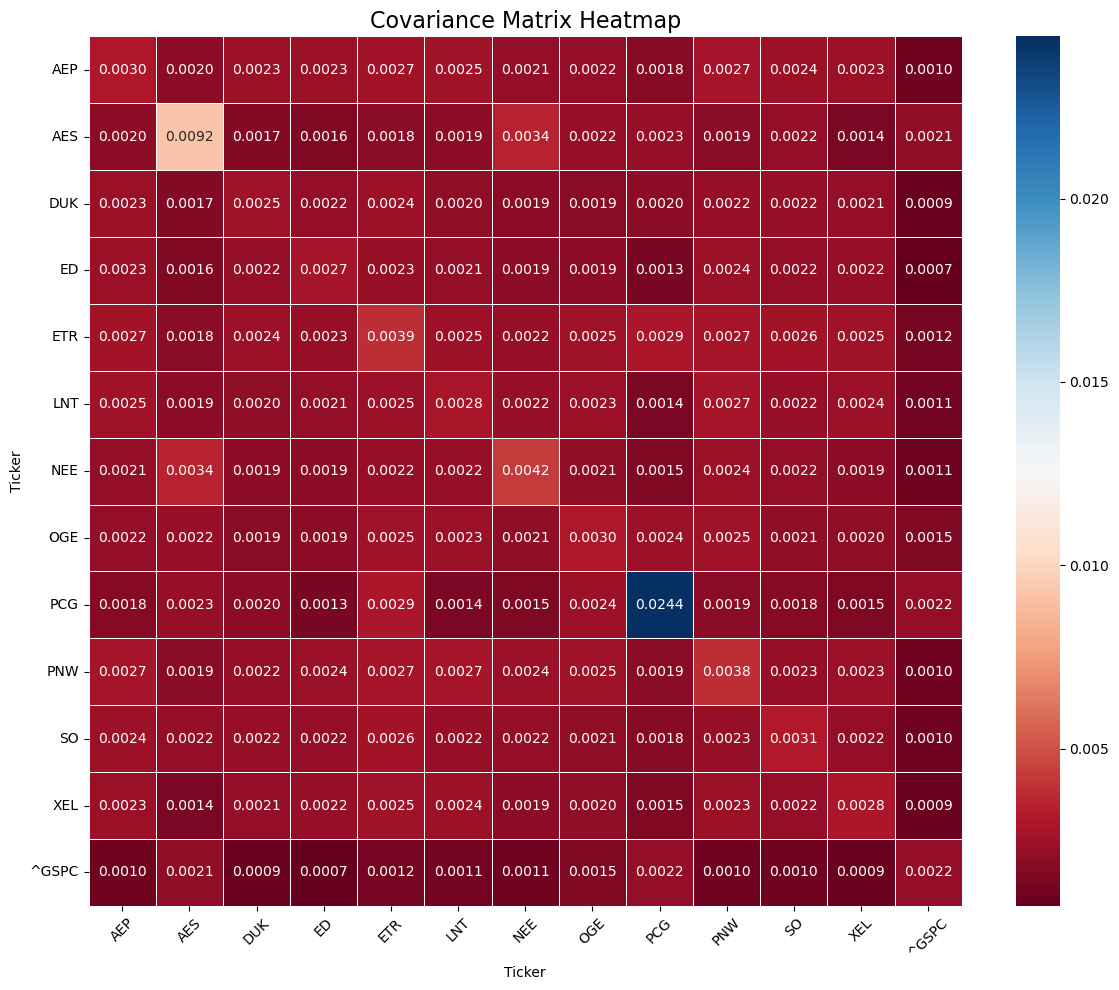

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(covariance, annot=True, fmt=".4f", cmap="RdBu", linewidths=0.5)
plt.title("Covariance Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
#Correlation Matrix
correlation=returns.corr()
print("Correlation Matrix:\n",correlation)

Correlation Matrix:
 Ticker       AEP       AES       DUK        ED       ETR       LNT       NEE  \
Ticker                                                                         
AEP     1.000000  0.371923  0.850499  0.815459  0.781137  0.860444  0.594680   
AES     0.371923  1.000000  0.349851  0.310454  0.306326  0.383738  0.550213   
DUK     0.850499  0.349851  1.000000  0.821874  0.770366  0.765279  0.589865   
ED      0.815459  0.310454  0.821874  1.000000  0.692954  0.775389  0.569424   
ETR     0.781137  0.306326  0.770366  0.692954  1.000000  0.750823  0.550562   
LNT     0.860444  0.383738  0.765279  0.775389  0.750823  1.000000  0.649935   
NEE     0.594680  0.550213  0.589865  0.569424  0.550562  0.649935  1.000000   
OGE     0.729114  0.420911  0.674997  0.667944  0.726733  0.803153  0.576556   
PCG     0.204979  0.150754  0.249691  0.155640  0.296104  0.167765  0.143082   
PNW     0.794367  0.315988  0.722497  0.727927  0.692556  0.817280  0.588889   
SO      0.785639  0

<function matplotlib.pyplot.show(close=None, block=None)>

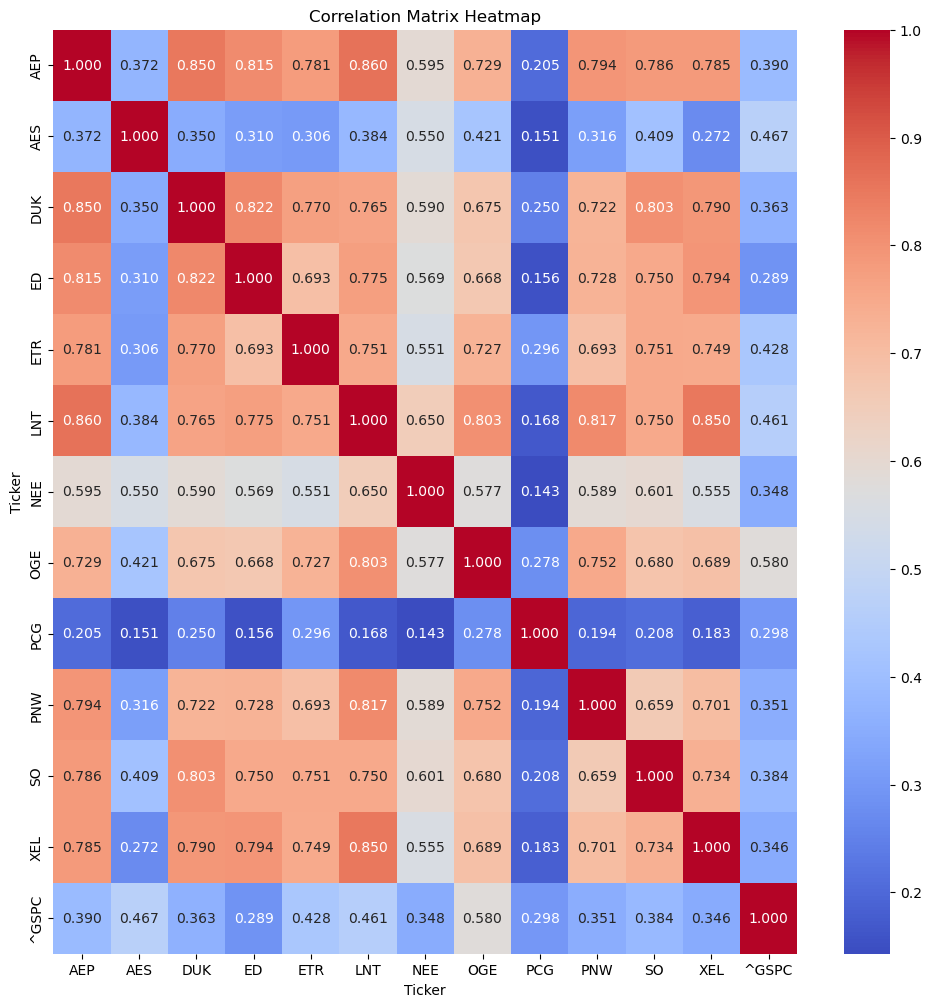

In [23]:
#Correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True,fmt=".3f",cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show


In [24]:
# Compare performance during market events
# US-China Trade War (2018-2019)
trade_war_period = returns.loc['2018-01':'2019-12']  # Full trade war period
trade_war_performance = trade_war_period.cumsum()
print("US-China Trade War Performance:")
print(trade_war_performance)


US-China Trade War Performance:
Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2018-01-01 -0.065108  0.067406 -0.066699 -0.054032 -0.033174 -0.067120   
2018-02-01 -0.111633  0.018365 -0.106953 -0.122101 -0.069646 -0.086475   
2018-03-01 -0.055576  0.064363 -0.066412 -0.071670 -0.004911 -0.029295   
2018-04-01 -0.035310  0.140880 -0.031689 -0.043572  0.030757  0.021855   
2018-05-01 -0.064319  0.193665 -0.069114 -0.086003  0.022423 -0.006171   
2018-06-01 -0.035704  0.245430 -0.032092 -0.060140  0.043838  0.015558   
2018-07-01 -0.008412  0.241701  0.000028 -0.047958  0.049903  0.030917   
2018-08-01 -0.000118  0.249186 -0.004628 -0.047958  0.078324  0.035731   
2018-09-01 -0.003254  0.299441 -0.008351 -0.073861  0.059381  0.029429   
2018-10-01  0.031734  0.340870  0.024266 -0.076355  0.094140  0.039060   
2018-11-01  0.091440  0.412686  0.096153 -0.019118  0.131186  0.103304   
2018-1

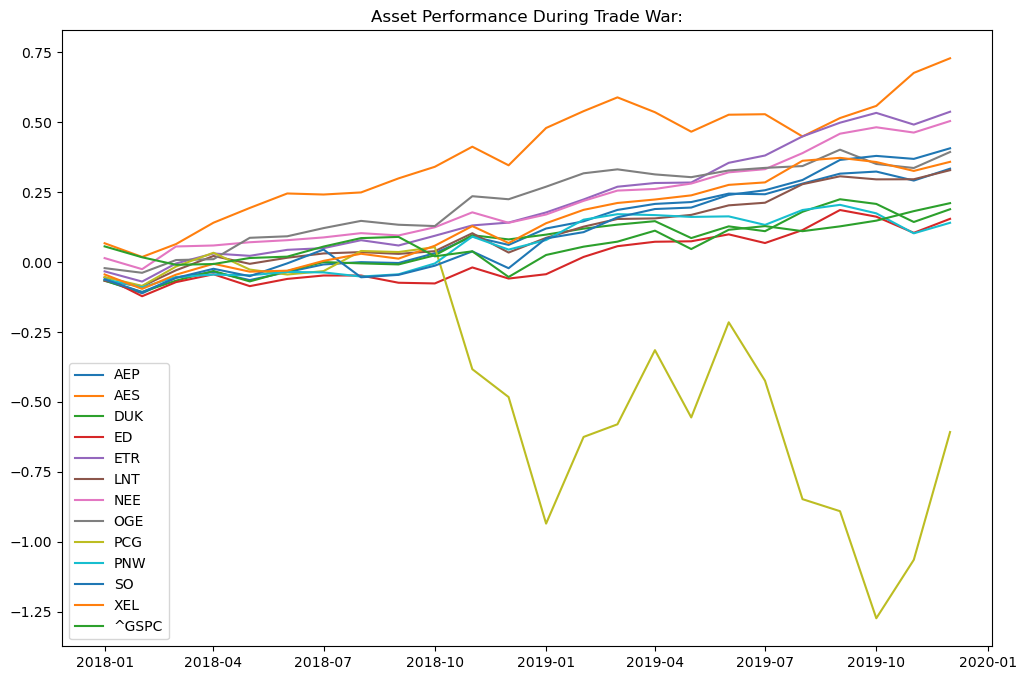

In [25]:
plt.figure(figsize=(12, 8))
for column in trade_war_performance.columns:
    plt.plot(trade_war_performance.index, trade_war_performance[column], label=column)
plt.title('Asset Performance During Trade War:')
plt.legend()
plt.show()

In [27]:
# COVID-19 Crash (Feb 2020 - April 2020)
covid_period = returns.loc['2020-01':'2021-04']
print("Covid")
covid_performance = covid_period.cumsum()

print(covid_performance)


Covid
Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2020-01-01  0.102740 -0.002010  0.070387  0.039019  0.097830  0.084795   
2020-02-01 -0.040802 -0.153643  0.009648 -0.122471 -0.013256 -0.031488   
2020-03-01 -0.138592 -0.340732 -0.099751 -0.124781 -0.203811 -0.104973   
2020-04-01 -0.099457 -0.366467 -0.053015 -0.114524 -0.187422 -0.099589   
2020-05-01 -0.073708 -0.414318 -0.041557 -0.161986 -0.121356 -0.075220   
2020-06-01 -0.131144 -0.254189 -0.097698 -0.193487 -0.191082 -0.106014   
2020-07-01 -0.040235 -0.203120 -0.036989 -0.125364 -0.070413  0.019614   
2020-08-01 -0.132891 -0.026748 -0.088913 -0.196821 -0.127390  0.032310   
2020-09-01 -0.087532 -0.006466  0.026163 -0.094940 -0.124408 -0.013858   
2020-10-01  0.012799  0.070287  0.066249 -0.086072 -0.097106  0.056422   
2020-11-01 -0.043245  0.126236  0.072221 -0.114610 -0.021726  0.014499   
2020-12-01 -0.054279  0.275942  

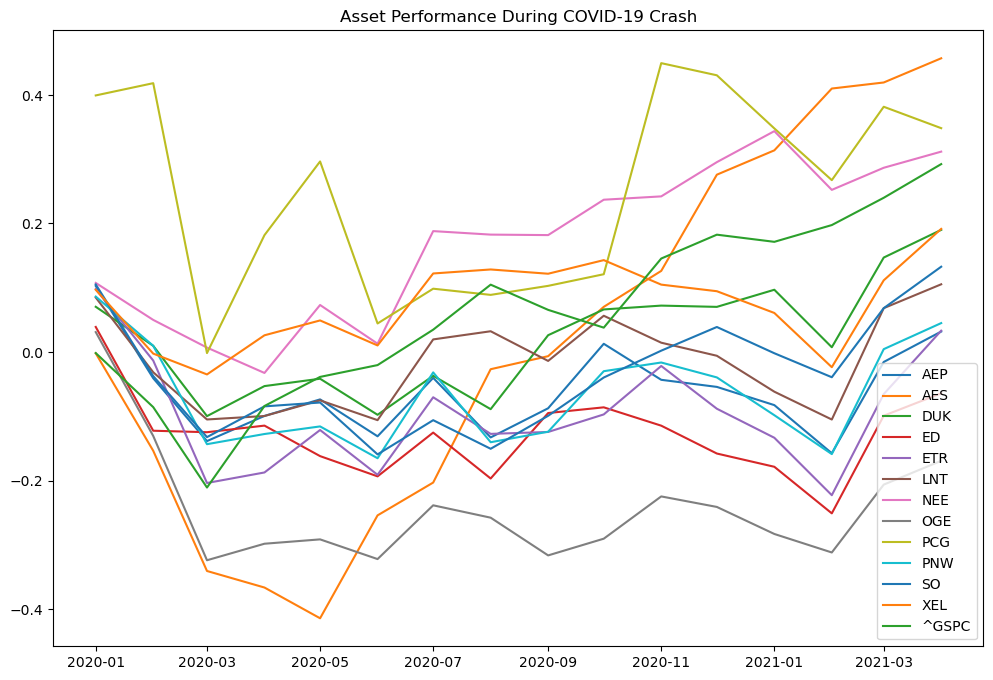

In [29]:
plt.figure(figsize=(12, 8))
for column in covid_performance.columns:
    plt.plot(covid_performance.index, covid_performance[column], label=column)
plt.title('Asset Performance During COVID-19 Crash')
plt.legend()
plt.show()

In [31]:
# Compare performance during the Oil Price Crash (April 2020)
oil_crash_period = returns.loc['2020-04':'2020-12']  
oil_crash_performance = oil_crash_period.cumsum()

print(oil_crash_performance)

Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2020-04-01  0.039135 -0.025735  0.046736  0.010257  0.016388  0.005384   
2020-05-01  0.064883 -0.073586  0.058194 -0.037205  0.082454  0.029753   
2020-06-01  0.007448  0.086543  0.002053 -0.068706  0.012728 -0.001041   
2020-07-01  0.098357  0.137612  0.062762 -0.000584  0.133398  0.124586   
2020-08-01  0.005701  0.313984  0.010838 -0.072040  0.076421  0.137282   
2020-09-01  0.051060  0.334266  0.125915  0.029840  0.079403  0.091114   
2020-10-01  0.151390  0.411019  0.166001  0.038709  0.106704  0.161395   
2020-11-01  0.095347  0.466968  0.171972  0.010170  0.182085  0.119472   
2020-12-01  0.084313  0.616674  0.169997 -0.033178  0.115559  0.099130   

Ticker           NEE       OGE       PCG       PNW        SO       XEL  \
Date                                                                     
2020-04-01 -0.039482  0.025708  0.183

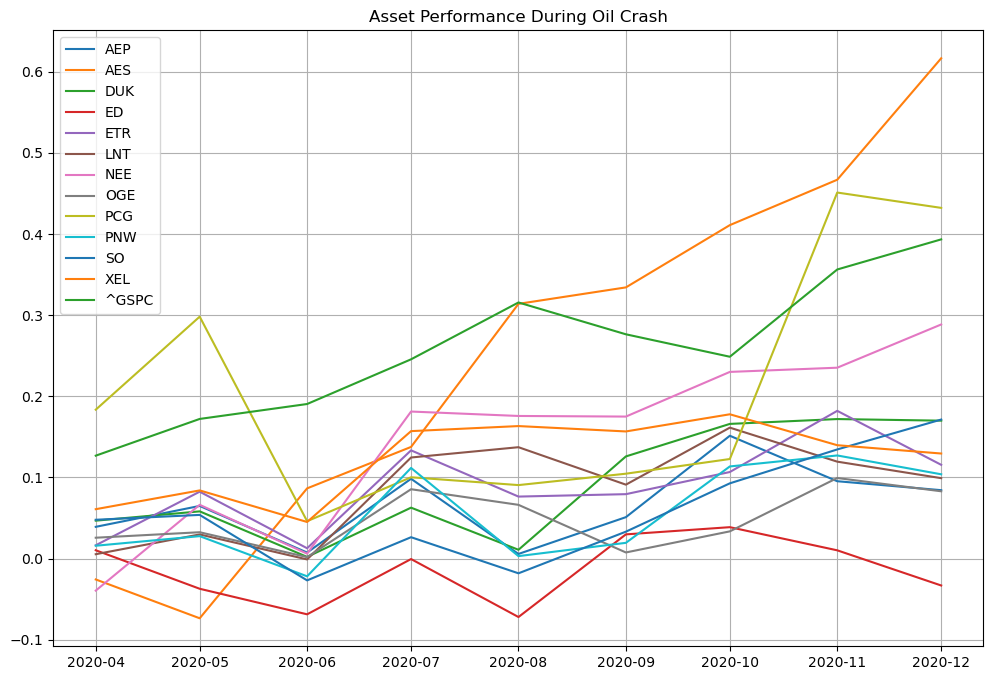

In [33]:
plt.figure(figsize=(12, 8))
for column in oil_crash_performance.columns:
    plt.plot(oil_crash_performance.index, oil_crash_performance[column], label=column)
plt.title('Asset Performance During Oil Crash')
plt.grid(True) 
plt.legend()
plt.show()


In [35]:
# Stock Market Boom (2021)
market_boom_period = returns.loc['2021-01':'2021-12']  # Full year of stock rally
market_boom_performance = market_boom_period.cumsum()
print("\nStock Market Boom 2021 Performance:")
print(market_boom_performance)


Stock Market Boom 2021 Performance:
Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2021-01-01 -0.028341  0.037872  0.026649 -0.020617 -0.045172 -0.055890   
2021-02-01 -0.103240  0.134052 -0.062819 -0.093095 -0.134546 -0.099200   
2021-03-01  0.038793  0.143465  0.076736  0.058843  0.022741  0.074110   
2021-04-01  0.086137  0.181138  0.119832  0.093737  0.121464  0.111222   
2021-05-01  0.055587  0.099467  0.115164  0.091540  0.084590  0.136139   
2021-06-01  0.047522  0.125441  0.109678  0.029306  0.040088  0.111817   
2021-07-01  0.089253  0.034532  0.174407  0.057890  0.072385  0.161494   
2021-08-01  0.105708  0.048011  0.170125  0.080663  0.147103  0.207205   
2021-09-01  0.019608  0.004441  0.111225  0.052381  0.060919  0.128080   
2021-10-01  0.063091  0.105186  0.156517  0.091092  0.098277  0.138619   
2021-11-01  0.019885  0.035548  0.107502  0.120800  0.072262  0.114070   
2

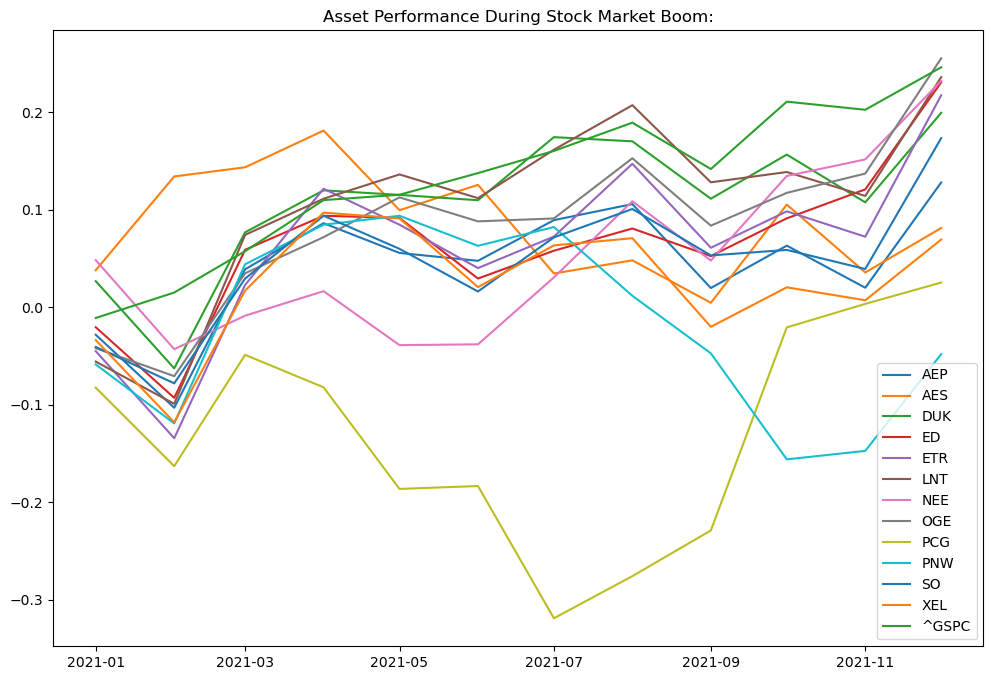

In [37]:
plt.figure(figsize=(12, 8))
for column in market_boom_performance.columns:
    plt.plot(market_boom_performance.index, market_boom_performance[column], label=column)
plt.title('Asset Performance During Stock Market Boom:')
plt.legend()
plt.show()

In [38]:
# Russia-Ukraine War (Feb 2022)
russia_ukraine_period = returns.loc['2022-02':'2022-08']  # Focusing on initial invasion impact
russia_ukraine_performance = russia_ukraine_period.cumsum()
print("Russia-Ukraine War Performance:")
print(russia_ukraine_performance)

Russia-Ukraine War Performance:
Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2022-02-01  0.002765 -0.035955 -0.044260 -0.007866 -0.058692 -0.017250   
2022-03-01  0.112973  0.176009  0.078898  0.106622  0.071474  0.052613   
2022-04-01  0.106357 -0.030364  0.065464  0.086132  0.089461 -0.006126   
2022-05-01  0.135820  0.057113  0.086888  0.156436  0.101829  0.086754   
2022-06-01  0.083550  0.010379  0.048312  0.122556  0.046115  0.005119   
2022-07-01  0.110858  0.067971  0.073683  0.166405  0.068220  0.044702   
2022-08-01  0.127498  0.221516  0.046211  0.150992  0.069697  0.053864   

Ticker           NEE       OGE       PCG       PNW        SO       XEL  \
Date                                                                     
2022-02-01  0.001920  0.001119 -0.111024  0.029884 -0.067924 -0.033448   
2022-03-01  0.090194  0.087137 -0.060892  0.132524  0.063098  0.038436   
2022-

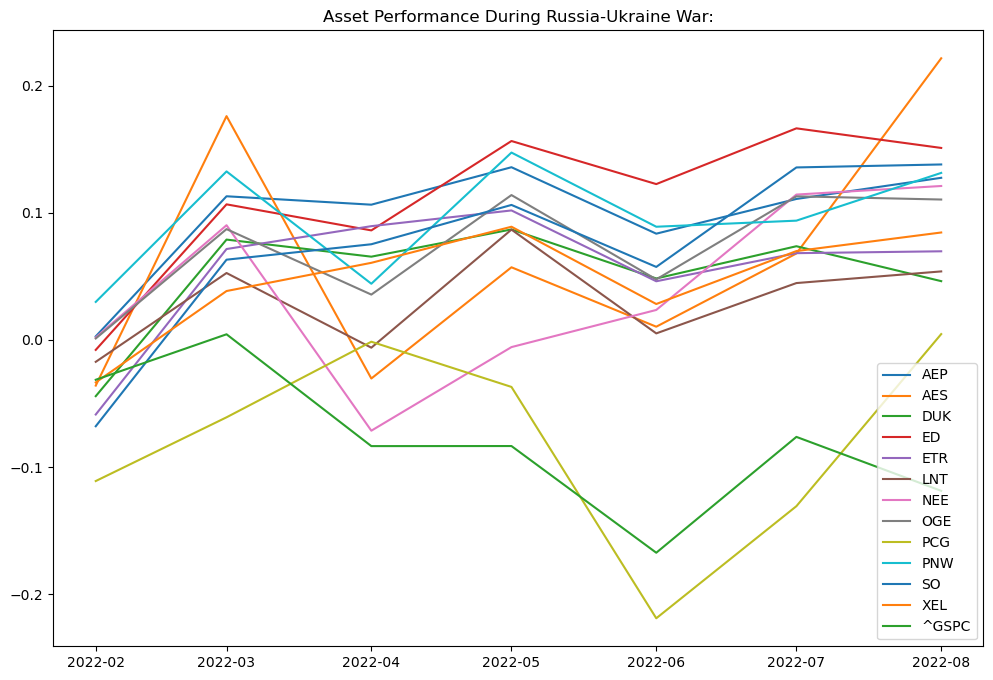

In [41]:
plt.figure(figsize=(12, 8))
for column in russia_ukraine_performance.columns:
    plt.plot(russia_ukraine_performance.index, russia_ukraine_performance[column], label=column)
plt.title('Asset Performance During Russia-Ukraine War:')
plt.legend()
plt.show()

In [43]:
# Artificial Intelligence (AI) Rally (2023)
ai_rally_period = returns.loc['2023-01':'2023-12']  # Full year to capture AI stock boom
ai_rally_performance = ai_rally_period.cumsum()
print("\nAI Rally 2023 Performance:")
print(ai_rally_performance)


AI Rally 2023 Performance:
Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2023-01-01 -0.010427 -0.046940 -0.005243  0.000000 -0.037511 -0.021373   
2023-02-01 -0.074177 -0.140852 -0.085185 -0.062533 -0.087474 -0.064490   
2023-03-01 -0.030260 -0.165163 -0.051271  0.017628 -0.018469 -0.022945   
2023-04-01 -0.014545 -0.182605 -0.026289  0.046896 -0.019954  0.009639   
2023-05-01 -0.115172 -0.342368 -0.123275 -0.005608 -0.107145 -0.049307   
2023-06-01 -0.092971 -0.292216 -0.107943 -0.028655 -0.095251 -0.029486   
2023-07-01 -0.086557 -0.248801 -0.064707  0.020682 -0.040512 -0.005477   
2023-08-01 -0.161375 -0.413469 -0.116191 -0.041515 -0.113053 -0.064087   
2023-09-01 -0.191980 -0.565728 -0.111037 -0.071297 -0.131081 -0.098371   
2023-10-01 -0.187726 -0.585465 -0.103899 -0.044874 -0.097676 -0.091353   
2023-11-01 -0.134642 -0.417462 -0.065762 -0.018447 -0.036791 -0.045185   
2023-12-01

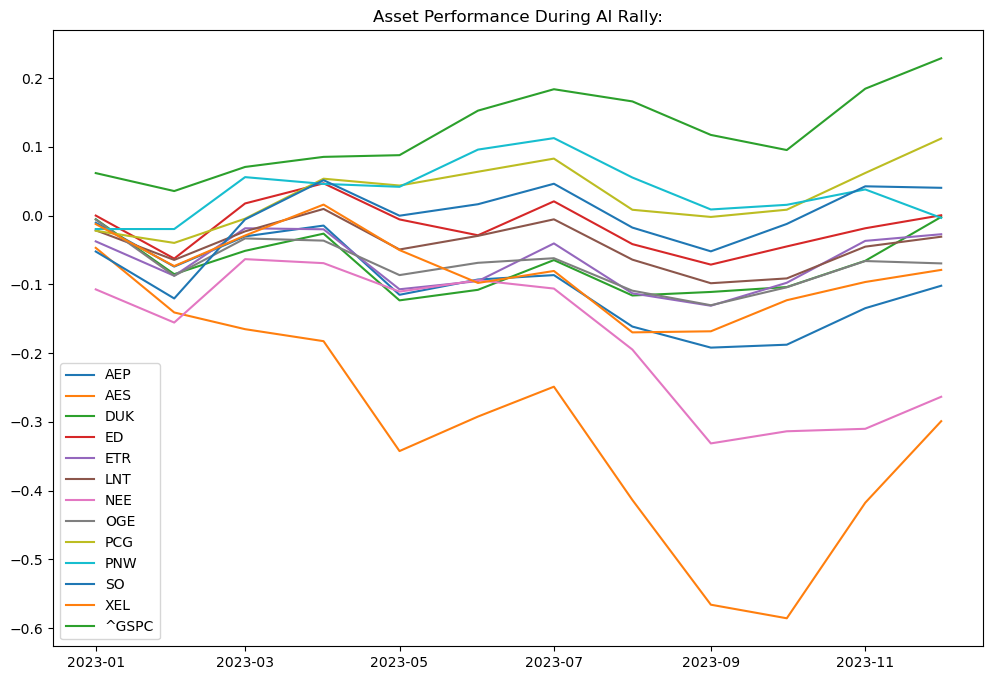

In [45]:
plt.figure(figsize=(12, 8))
for column in ai_rally_performance.columns:
    plt.plot(ai_rally_performance.index, ai_rally_performance[column], label=column)
plt.title('Asset Performance During AI Rally:')
plt.legend()
plt.show()

In [47]:
# 2024 US Presidential Elections
election_period = returns.loc['2024-01':'2024-12']  # Full year to account for pre- and post-election effects
election_performance = election_period.cumsum()
print("\n2024 US Presidential Elections Performance:")
print(election_performance)


2024 US Presidential Elections Performance:
Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2024-01-01 -0.037922 -0.133507 -0.012469 -0.000770 -0.014132 -0.051462   
2024-02-01  0.052301 -0.212850 -0.054210 -0.041364  0.004012 -0.060493   
2024-03-01  0.074617 -0.033245  0.010884  0.009668  0.068844 -0.004996   
2024-04-01  0.073804 -0.034918  0.026912  0.049202  0.078212 -0.016901   
2024-05-01  0.122856  0.183025  0.080952  0.050791  0.132773  0.027141   
2024-06-01  0.104582 -0.003172  0.058397  0.004642  0.094152  0.015682   
2024-07-01  0.222887  0.009349  0.148590  0.095226  0.177984  0.109199   
2024-08-01  0.244900 -0.027751  0.191419  0.136653  0.218684  0.165121   
2024-09-01  0.277302  0.154794  0.212702  0.170403  0.319751  0.206651   
2024-10-01  0.239778 -0.023172  0.212442  0.146875  0.495802  0.195282   
2024-11-01  0.251018 -0.232390  0.227884  0.136155  0.504782  0.257

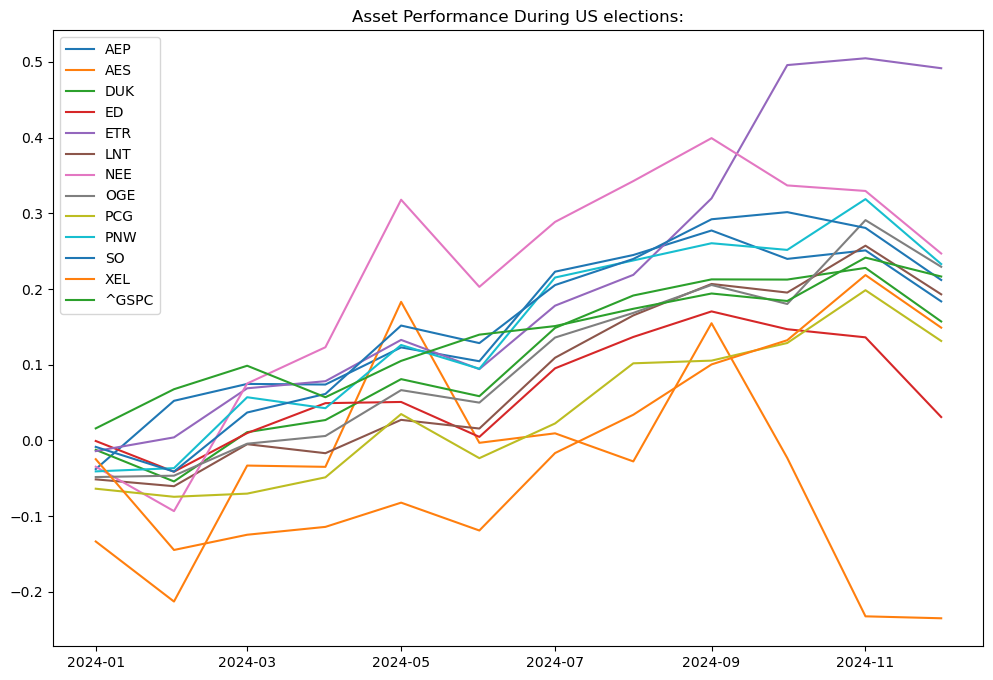

In [49]:
plt.figure(figsize=(12, 8))
for column in election_performance.columns:
    plt.plot(election_performance.index, election_performance[column], label=column)
plt.title('Asset Performance During US elections:')
plt.legend()
plt.show()

In [51]:
# S&P 500 Returns
spy_data = yf.download("SPY", start="2017-01-01", end="2025-01-01",interval='1mo')['Close']
spy_returns = spy_data.pct_change().dropna()
print(spy_returns)

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Ticker           SPY
Date                
2017-02-01  0.039291
2017-03-01 -0.003087
2017-04-01  0.014320
2017-05-01  0.014113
2017-06-01  0.001491
...              ...
2024-08-01  0.023365
2024-09-01  0.017883
2024-10-01 -0.005884
2024-11-01  0.059633
2024-12-01 -0.027334

[95 rows x 1 columns]
